In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
 df.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

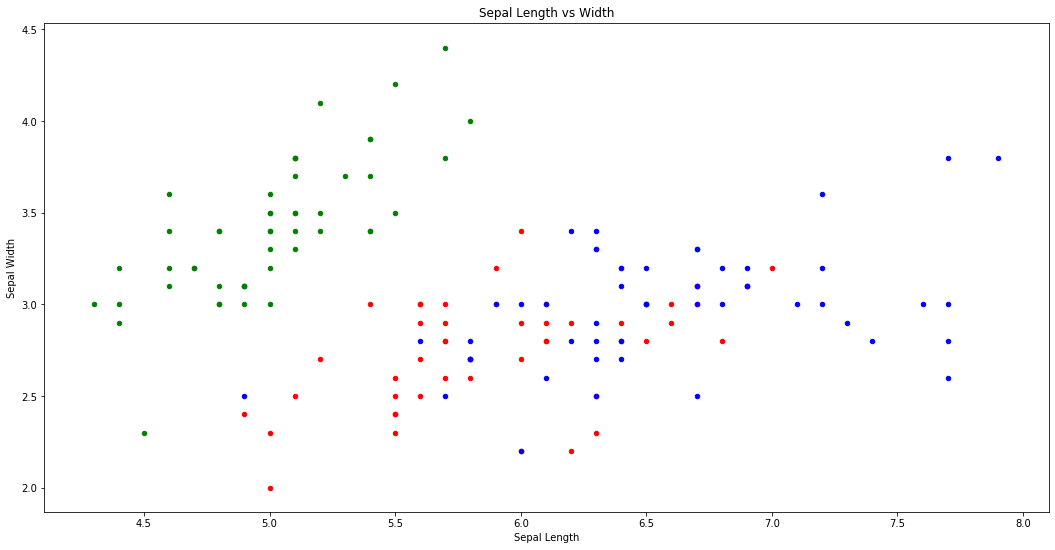

In [5]:
fig = df[df['species'] == "Iris-versicolor"].plot(kind = "Scatter", x = "sepal_length", y = "sepal_width", color = "red")
df[df['species'] == "Iris-setosa"].plot(kind = "Scatter", x = "sepal_length", y = "sepal_width", color = "green", ax=fig)
df[df['species'] == "Iris-virginica"].plot(kind = "Scatter", x = "sepal_length", y = "sepal_width", color = "blue", ax=fig)
fig.set_ylabel('Sepal Width')
fig.set_xlabel('Sepal Length')
fig.set_title('Sepal Length vs Width')

fig = plt.gcf()
fig.set_size_inches(18, 9)
plt.show()

In [6]:
df.species.groupby(pd.qcut(df.petal_width, 3)).value_counts()

petal_width     species        
(0.099, 0.867]  Iris-setosa        50
(0.867, 1.6]    Iris-versicolor    48
                Iris-virginica      4
(1.6, 2.5]      Iris-virginica     46
                Iris-versicolor     2
Name: species, dtype: int64

In [7]:
df['petal_area'] = df.apply(lambda row: (row['petal_length']*row['petal_width']), axis = 1)

In [8]:
df['sepal_area'] = df.apply(lambda row: (row['sepal_length']*row['sepal_width']), axis = 1)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00


In [11]:
df.species.groupby(pd.qcut(df.petal_area, 3)).value_counts()

petal_area      species        
(0.109, 2.52]   Iris-setosa        50
(2.52, 7.713]   Iris-versicolor    47
                Iris-virginica      3
(7.713, 15.87]  Iris-virginica     47
                Iris-versicolor     3
Name: species, dtype: int64

In [12]:
df.species.groupby(pd.qcut(df.sepal_area, 3)).value_counts()

sepal_area      species        
(9.999, 16.2]   Iris-versicolor    24
                Iris-setosa        19
                Iris-virginica      8
(16.2, 19.38]   Iris-setosa        22
                Iris-versicolor    17
                Iris-virginica     12
(19.38, 30.02]  Iris-virginica     30
                Iris-setosa         9
                Iris-versicolor     9
Name: species, dtype: int64

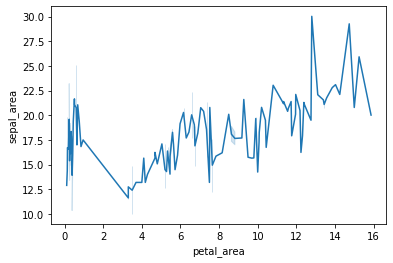

In [13]:
sns.lineplot(df['petal_area'], df['sepal_area'])

In [14]:
df['area_diff'] = df.apply(lambda row: (row['sepal_area'] - row['petal_area']), axis=1)

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,area_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85,17.57
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70,14.42
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04,14.78
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26,13.96
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00,17.72


In [16]:
df['species'].groupby(pd.qcut(df['area_diff'], 3)).value_counts()


area_diff        species        
(3.999, 9.45]    Iris-virginica     36
                 Iris-versicolor    14
(9.45, 13.867]   Iris-versicolor    33
                 Iris-virginica     12
                 Iris-setosa         5
(13.867, 24.48]  Iris-setosa        45
                 Iris-versicolor     3
                 Iris-virginica      2
Name: species, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(df.iloc[:, 5:-1], df.iloc[:, 4])
print("%.4f" % rf.oob_score_)

0.9533
